In [8]:
import pandas as pd
import numpy as np
import os
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

**Note**: The following function produces a component plot of a vector.

In [9]:
def plotveccomp(x, name = ' ', color = 'black', marker = '*', axis = None):
  ax = axis
  component_index = range(0, len(x))
  ax.plot(component_index, x, color = color, marker = marker) 
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='blue') 
  ax.plot(component_index, [np.mean(x) - np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.plot(component_index, [np.mean(x) + np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.set_xlabel('Index')
  ax.set_ylabel('Value')
  ax.set_title('Component plot of '+name)

**Note**: The following function generates a random $n\times n$-matrix for a given input $n.$ The entries of the matrix are *normally* distrbuted with mean 0 and standard deviation 1. Do not worry what "normally" distributed means.

In [10]:
def genrandMatrix(n):
  A = np.random.normal(0, 1, (n, n))
  return(A)

**Question-1**: Generate a $3\times 3$-random matrix.

In [11]:
A = genrandMatrix(3)
print(A)

[[-0.08152416 -0.35867444 -0.016773  ]
 [-0.90333265 -1.30444754 -0.93693168]
 [ 1.29886629  1.19302302  0.2708703 ]]


**Question-2**: Calculate the mean and standard deviations of the columns of the matrix generated above.

In [12]:
print(np.mean(A, axis = 0))
print(np.std(A, axis = 0))

[ 0.10466983 -0.15669965 -0.22761146]
[0.90863311 1.02954202 0.5151285 ]


**Question-3**: Check if the columns of the matrix generated above are linearly independent.

In [13]:
AugmentedMatrix = sp.Matrix([A[0, :], A[1, :], A[2, :]])
print(AugmentedMatrix.rref())

(Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]), (0, 1, 2))


**Question-4**: What are the coordinates of the vector $b = \begin{bmatrix}1\\2\\3\end{bmatrix}$ with respect to the 

1.   columns of the matrix generated above
2.   rows of the matrix generated above



In [14]:
b = np.array([1, 2, 3])
# Coordinates with respect to columns of A
AugmentedMatrix = sp.Matrix([np.hstack((A[0, :], b[0])),
                             np.hstack((A[1, :], b[1])),
                             np.hstack((A[2, :], b[2]))])
print(AugmentedMatrix)
x1, x2, x3 = sp.symbols('x1, x2, x3')
print(sp.linsolve(AugmentedMatrix, (x1, x2, x3)))

# Coordinates with respect to rows of A
AugmentedMatrix = sp.Matrix([np.hstack((A[:, 0], b[0])),
                             np.hstack((A[:, 1], b[1])),
                             np.hstack((A[:, 2], b[2]))])
print(AugmentedMatrix)
x1, x2, x3 = sp.symbols('x1, x2, x3')
print(sp.linsolve(AugmentedMatrix, (x1, x2, x3)))


Matrix([[-0.0815241583474573, -0.358674437546747, -0.0167729970475822, 1.00000000000000], [-0.903332653938594, -1.30444754186662, -0.936931684053753, 2.00000000000000], [1.29886629017967, 1.19302301831636, 0.270870304334058, 3.00000000000000]])
{(6.74214015236932, -4.18944179876556, -2.80221957006858)}
Matrix([[-0.0815241583474573, -0.903332653938594, 1.29886629017967, 1.00000000000000], [-0.358674437546747, -1.30444754186662, 1.19302301831636, 2.00000000000000], [-0.0167729970475822, -0.936931684053753, 0.270870304334058, 3.00000000000000]])
{(2.42603429935984, -3.72842436602015, -1.67086257422904)}


**Question-5**: Generate a $8\times 8$-random matrix and flatten it into a 1D-vector $a$.

In [22]:
n = 8
a = genrandMatrix(n).flatten()
print(a.shape)

(64,)


**Question-6**: Make a component plot of the vector $a$.

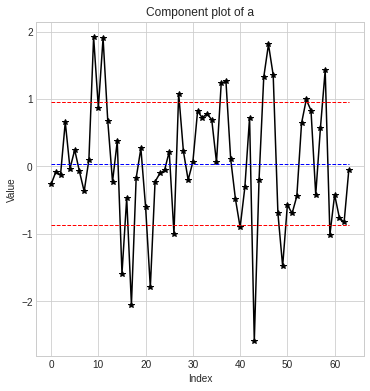

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
plotveccomp(a, 'a', 'black', '*', ax)

**Question-7**: What percentage of components of $a$ are beyond 1 standard deviation from the mean?

In [23]:
(sum(abs(a-np.mean(a)) >=  1*np.std(a))/len(a))*100

35.9375

**Note**: The following function generates a so called Hadamard matrix $H.$ The columns of the generated matrix $H$ form a set of basis vectors. Pay close attention to the columns of the matrix.

In [24]:
from scipy.linalg import hadamard
H = hadamard(4) # columns of this form a basis for representing 4-vectors
print(H)

[[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]]


**Question-8**: Generate a Hadamard matrix with number of rows and columns equal to the size of vector $a$.

In [26]:
H = hadamard(len(a))

**Question-9**: Check if the columns of $H$ are mutually orthogonal.

In [27]:
np.dot(H.T, H)

array([[64,  0,  0, ...,  0,  0,  0],
       [ 0, 64,  0, ...,  0,  0,  0],
       [ 0,  0, 64, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 64,  0,  0],
       [ 0,  0,  0, ...,  0, 64,  0],
       [ 0,  0,  0, ...,  0,  0, 64]])

**Question-10**: Normalize the columns of $H.$

In [28]:
H_normalized = (1/n)*H

**Question-11**: Print the norms of the columns of the normalized version of $H.$

In [ ]:
np.linalg.norm(H_normalized, axis = 0)

**Question-12**: Calculate the scalar projections (shadow lengths) of $a$ on to the columns of the normalized version of $H$ and store them in a vector $u.$

In [29]:
u = np.dot(H_normalized.T, a)

**Question-13**: Make a component plot of $a$ and $u$ in two figures. Use different colors for the vectors.

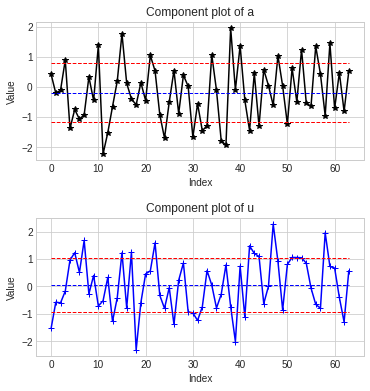

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
plotveccomp(a, 'a', 'black', '*', ax1)
plotveccomp(u, 'u', 'blue', '+', ax2)


**Question-14**: What percentage of components of $u$ are beyond 1 standard deviation from the mean? How dows it compare with that of $a$?

In [31]:
(sum(abs(u - np.mean(u)) >= np.std(u))/len(u))*100

32.8125